# Break picture into multiple parts for printing (with optional common margin)

In [7]:
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

def create_sub_pic(img,no_of_sub_pics,margin=0.01,save_sub_parts=False): #takes a picture to break it into sub parts with margins
    global j
    h,l,d=img.shape
    if math.log(no_of_sub_pics,2)%2 == 0:
        if no_of_sub_pics != 1:
            h = int(h//2+round(margin*h,0))
            l = int(l//2+round(margin*l,0))
            create_sub_pic(img[:h,:l,:],no_of_sub_pics//4,save_sub_parts=save_sub_parts)
            create_sub_pic(img[:h,-l:,:],no_of_sub_pics//4,save_sub_parts=save_sub_parts)
            create_sub_pic(img[-h:,:l,:],no_of_sub_pics//4,save_sub_parts=save_sub_parts)
            create_sub_pic(img[-h:,-l:,:],no_of_sub_pics//4,save_sub_parts=save_sub_parts)
        else:
            if save_sub_parts:
                mpimg.imsave(output_path+img_name+'_part'+str(j+1)+'.jpg',img)
            else:
                if j+1==8:
                    print('Sub pic shape:',img.shape)
                    plt.imshow(img)
            j+=1
            
    else:
        if h > l: #break the picture on the longer axis
            h = int(h//2+int(margin*h))
            create_sub_pic(img[:h,:,:],no_of_sub_pics//2)
            create_sub_pic(img[-h:,:,:],no_of_sub_pics//2)
        else:
            l = int(l//2+int(margin*l))
            create_sub_pic(img[:,:l,:],no_of_sub_pics//2,save_sub_parts=save_sub_parts)
            create_sub_pic(img[:,-l:,:],no_of_sub_pics//2,save_sub_parts=save_sub_parts)

In [13]:
# !dir C:\Users\Surya\Pictures\Wall Poster
!dir C:\Users\Surya\Pictures\GitHub\
#     WallPoster

 Volume in drive C has no label.
 Volume Serial Number is 5C53-8C7E

 Directory of C:\Users\Surya\Pictures


 Directory of C:\Users\Surya\Pictures\GitHub\print_in_A4\WallPoster

09/18/2018  09:14 AM    <DIR>          .
09/18/2018  09:14 AM    <DIR>          ..
09/17/2018  10:43 PM            97,633 BB.jpg
09/17/2018  10:57 PM            88,565 The cove.jpg
09/18/2018  09:16 AM    <DIR>          ToPrint
               2 File(s)        186,198 bytes
               3 Dir(s)  32,298,450,944 bytes free


File Not Found


In [12]:
#Print multiple sections
img_name = 'BB'
img_path = "C:\\Users\\Surya\\Pictures\\WallPoster\\"+img_name+".jpg"
output_path = "C:\\Users\\Surya\\Pictures\\WallPoster\\ToPrint\\"
no_of_sub_pics = 16

img = mpimg.imread(img_path)
h,l,d=img.shape
print('Image shape:',(h,l,d))
print('Recommended parts:',int(math.pow(2,math.log(h*l//(400*250),2)//1)))
global j;j=0
create_sub_pic(img,no_of_sub_pics,save_sub_parts=True)

Image shape: (1080, 1920, 3)
Recommended parts: 16


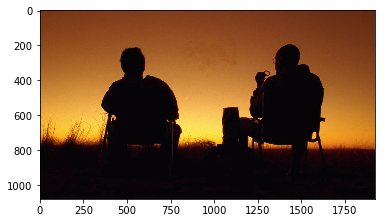

In [11]:
plt.imshow(img)